In [23]:
from keras.callbacks import History
# BASIC DATASETS QUESTION
#
# Create a classifier for the German Traffic Signs dataset that classifies
# images of traffic signs into 43 classes.
# ==============================================================================
#
# ABOUT THE DATASET
#
# The dataset contains traffic sign boards from the streets captured into
# image files. There are 43 unique classes in total. The images are of shape
# (30,30,3).
# ==============================================================================
import urllib
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

def preprocess(image, label):
    image = image / 255.0
    return image, label

In [24]:
download_and_extract_data()

BATCH_SIZE = 32
IMG_SIZE = 30

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
directory='train/',
label_mode='categorical',
image_size=  (IMG_SIZE,IMG_SIZE), batch_size = BATCH_SIZE)

print(train_ds)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
directory='validation/',
label_mode='categorical',
image_size= (IMG_SIZE,IMG_SIZE)
, batch_size = BATCH_SIZE)

print(val_ds)


train_ds = train_ds.map(
preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(
preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

print(train_ds)


# Code to define the model
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
#tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(43, activation=tf.nn.softmax)
])

# Code to compile and train the model
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'])

model.summary()

Found 31367 files belonging to 43 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
Found 7842 files belonging to 43 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                             

In [25]:
history = model.fit(train_ds,validation_data=val_ds,epochs=15,batch_size=32)

Epoch 1/15
981/981 [==============================] - 11s 10ms/step - loss: 1.4132 - acc: 0.6042 - val_loss: 0.3523 - val_acc: 0.9146
Epoch 2/15
981/981 [==============================] - 9s 10ms/step - loss: 0.3607 - acc: 0.8921 - val_loss: 0.1477 - val_acc: 0.9645
Epoch 3/15
981/981 [==============================] - 9s 9ms/step - loss: 0.2046 - acc: 0.9381 - val_loss: 0.1086 - val_acc: 0.9719
Epoch 4/15
981/981 [==============================] - 10s 11ms/step - loss: 0.1493 - acc: 0.9553 - val_loss: 0.0809 - val_acc: 0.9806
Epoch 5/15
981/981 [==============================] - 9s 9ms/step - loss: 0.1095 - acc: 0.9659 - val_loss: 0.0646 - val_acc: 0.9819
Epoch 6/15
981/981 [==============================] - 9s 9ms/step - loss: 0.0896 - acc: 0.9724 - val_loss: 0.0565 - val_acc: 0.9847
Epoch 7/15
981/981 [==============================] - 8s 9ms/step - loss: 0.0763 - acc: 0.9758 - val_loss: 0.0715 - val_acc: 0.9836
Epoch 8/15
981/981 [==============================] - 9s 10ms/step - lo

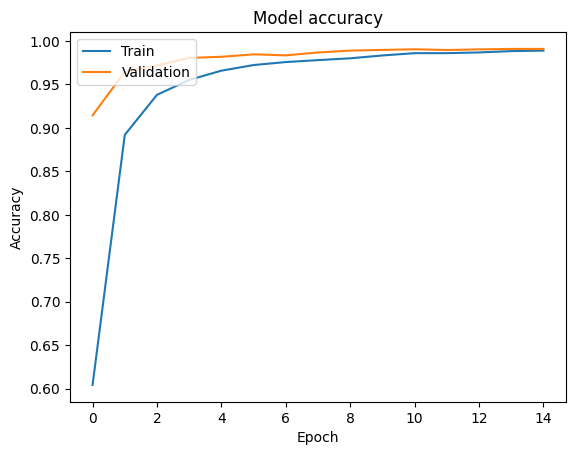

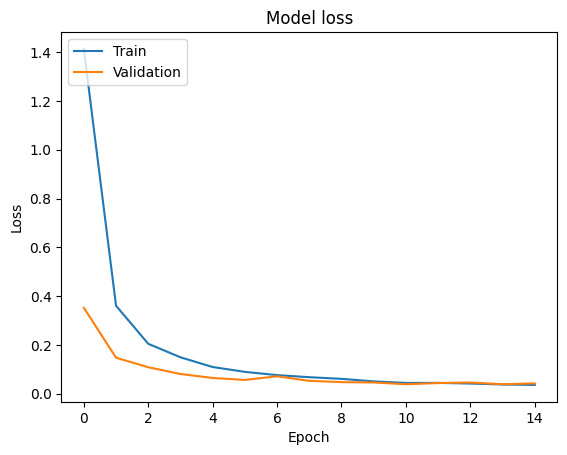

In [26]:
import matplotlib.pyplot as plt

# Plot the accuracy curves for training and validation
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curves for training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
import numpy as np

# Extract the images and labels from the validation dataset
X_val = []
y_val = []
for images, labels in val_ds:
    X_val.append(images.numpy())
    y_val.append(labels.numpy())

# Convert the list of images and labels to numpy arrays
X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

# Make predictions on the validation set using the trained model
y_pred = model.predict(X_val)

# Convert the predicted labels from probabilities to binary format
y_pred_binary = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoding to binary format
y_true_binary = np.argmax(y_val, axis=1)


246/246 [==============================] - 0s 2ms/step


In [28]:
from sklearn.metrics import classification_report

# Calculate the precision, recall, and F1 score for each class
report = classification_report(y_true_binary, y_pred_binary)
print('Classification report:')
print(report)


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98       444
           2       0.97      1.00      0.98       450
           3       0.98      0.99      0.98       282
           4       1.00      0.99      1.00       396
           5       0.99      0.98      0.98       372
           6       1.00      1.00      1.00        84
           7       0.99      0.98      0.98       288
           8       0.99      0.97      0.98       282
           9       1.00      0.99      0.99       294
          10       1.00      0.99      0.99       402
          11       1.00      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       0.99      1.00      1.00       156
          15       1.00      1.00      1.00       126
          16       1.00      1.00      1.00        84
    

In [29]:
# Calculate the F1 score
f1score = f1_score(y_true_binary, y_pred_binary, average='weighted')
print('F1 score: {:.2f}'.format(f1score))

F1 score: 0.99
